# Prophet Model

- Decomposable time series model with there model components: trend, seasonality, and holidays

$$
y(t) = g(t) + s(t) + h(t) + \epsilon_t
$$

- $g(t)$ is the trend function which models non-periodic changes in the value of the time series

- $s(t)$ represents periodic changes [e.g., weekly and yearly seasonality]

- $h(t)$ represents the effects of holidays which occur on potentially irregular schedules over one or more days.

## The Trend Model

- Nonlinear, Saturating Growth
    - Nonlinear growth that saturates at a carrying capacity.
    - Logistic growth model  
$$
\begin{gathered}
g(t) = \frac{C}{1 + exp({-k(t-m)})} \\
\text{with C the carrying capacity, k the growth rate, and m an offset parameter}
\end{gathered}
$$

- The carrying capacity is not constant -> time - varying capacity C(t)

- The growth rate is not constant -> varying growth rate

- Trend changes in the growth model by explicitly defining changepoints where the growth rate is allowed to change.

- Suppose there are $S$ changepoints at times $s_j,\ j = 1, \cdots, S$

- Define a vector of rate adjustments $\delta \in \mathbb{R}^s$, where $\delta_j$ is the change in rate that occurs at time $s_j$.

$$
k + \sum_{j : t \ge s_j} \delta_j 
\quad\Longrightarrow\quad
a(t) \in \{0,1\}^S \text{, 단 } a_j(t) = 
\begin{cases}
1, & \text{if } t \ge s_j \\
0, & \text{otherwise}
\end{cases},
\quad
k + a(t)^T \delta
$$

- The offset parameter m must also be adjusted to connect the endpoints of the segments.

- Offset parameter m adjustment [$m + a(t)^T\gamma$]:
$$
\gamma_j
=
\bigl(s_j - m - \sum_{l<j}\gamma_l\bigr)
\Bigl(
  1 - \frac{k + \sum_{l<j}\delta_l}{\,k + \sum_{l \le j}\delta_l}
\Bigr)
$$

- The piecewise logistic growth model is then:
$$
g(t)
=
\frac{C(t)}{
  1
  + \exp\!\Bigl(
    -\bigl(k + a(t)^T \delta\bigr)\,
     \bigl(t - \bigl(m + a(t)^T \gamma\bigr)\bigr)
  \Bigr)
}
$$

- Offset parameter adjustment

changepoint 전 구간에서의 성장률은
$$
k_{j-1} = k + \sum_{l < j}\delta_l
$$
changepoint 후 구간에서의 성장률은 
$$
k_j = k + \sum_{l <= j}\delta_l
$$

logistic 함수가 끊기지 않고 이어지도록 하기 위해서는 이전 구간의 logistic 함수가 $s_j$에서 가지는 값과 다음 구간의 logistic 함수가 $s_j$에서 가지는 값이 서로 동일해야 하므로 
$$
(k + \sum_{l < j}\delta_l)(s_j - m_{j-1}) = (k + \sum_{j <= j}\delta_l)(s_j - (m_{j-1} - \gamma_j))
$$  

$a = k + \sum_{l < j}\delta_l,\ b = s_j - m_{j-1}$로 놓고 정리하면 
$$
ab = (a + \delta_j)(b - \gamma_j)
$$ 

$$ 
\therefore \gamma_j = \frac{b\delta_j}{a + \delta_j} = \frac{(s_j - m_{j-1})\delta_j}{k + \sum_{l <=j}\delta_l}
$$

$$
1 - \frac{k + \sum_{l < j}\delta_l}{k + \sum_{l <= j}\delta_l} = \frac{(k + \sum_{l <= j}\delta_l) - (k + \sum_{l < j}\delta_l)}{k + \sum_{l <= j}\delta_l} = \frac{\sum_{l <= j}\delta_l - \sum_{l < j}\delta_l}{k + \sum_{l <=j}\delta_l} = \frac{\delta_j}{k + \sum_{l <= j}\delta_l} \text{ 이고}
$$  

$$
m_{j-1} = m + \sum_{l < j} \gamma_l \text{ 이므로}
$$

$$
\gamma_j = (1 - \frac{k + \sum_{l < j}\delta_l}{k + \sum_{l <= j}\delta_l})(s_j - (m + \sum_{l < j}\gamma_l)) \text{ 이다.}
$$

- For forecasting problems that do not exhibit saturating growth

- Linear Trend with changepoints
$$
g(t) = (k + a(t)^T \delta)t + (m + a(t)^T \gamma)
$$

- $k$ is the growth rate, $\delta$ has the rate adjustments, $m$ is the offset parameter, and $\gamma_j$ is set to $-s_j \gamma_j$ to make the function continuous.

- Trend forecast uncertainty:
$$
\forall j > T,\;\;
\begin{cases}
\delta_j = 0 \quad \text{with probability } \frac{T - s}{T},\\[6pt]
\delta_j \sim \mathrm{Laplace}(0, \lambda) \quad \text{with probability } \frac{s}{T}
\end{cases}
$$


## Seasonality

- Rely on Fourier series to provide flexible model of periodic effects.

- Let P be the regular period we expect the time series to have P = 365.25(yearly), P = 7(weekly)

$$ 
s(t) = \sum_{n=1}^{N} \Bigl( 
    a_n \cos\!\Bigl(\frac{2 \pi n t}{P}\Bigr)
    \;+\;
    b_n \sin\!\Bigl(\frac{2 \pi n t}{P}\Bigr)
\Bigr)
$$

- Fitting seasonality requires estimating the 2N parameters.

- N = 10 (yearly) and N = 3 (weekly) work well for most problems.

## Holidays

- Holidays and Events provide large, somewhat predictable shocks to many business time series and often do not follow a periodict pattern.

- Thanksgiving in the U.S.

- The Super Bowl (Sunday in January or Feburary)

- Lunar calendar holidays

- For each holiday i, let $D_i$ be the set of past and future dates for that holiday.

$$Z(t) = \bigl[1(t \in D_1), \dots, 1(t \in D_L)\bigr]$$
$$h(t) = Z(t)\,\kappa, 
\quad \text{with prior } \kappa \sim \mathrm{Normal}(0,\nu^2)$$

In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

## (1) Data Preprocessing

In [4]:
df = pd.read_csv('../data/air_passengers.csv')
df['Month'] = pd.DatetimeIndex(df['Month'])

<Axes: >

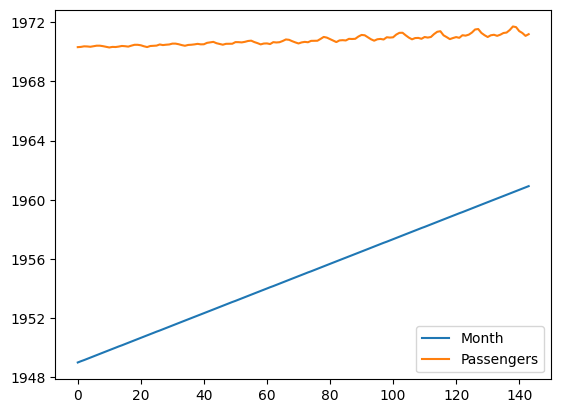

In [5]:
df.plot()

### Prophet imposes the strict condition that the input columns must be named as ds (the time column) and y (the metric column).

In [6]:
df = df.rename(columns={'Month': 'ds',
                        'Passengers': 'y'})
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## (2) Time Series Forecasting with Prophet

In [7]:
my_model = Prophet(interval_width=0.95)

In [8]:
my_model.fit(df)

21:17:49 - cmdstanpy - INFO - Chain [1] start processing
21:17:50 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01


In [10]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,84.814159,40.714799,129.554841
1,1949-02-01,78.227931,32.576865,124.061404
2,1949-03-01,110.342237,66.674434,152.118496
3,1949-04-01,107.810718,66.278630,155.808846
4,1949-05-01,111.266255,66.416836,154.186501


### Forecasted values: blue line
### Observed values: black dots
### Uncertainty intervals: blue shaded regions

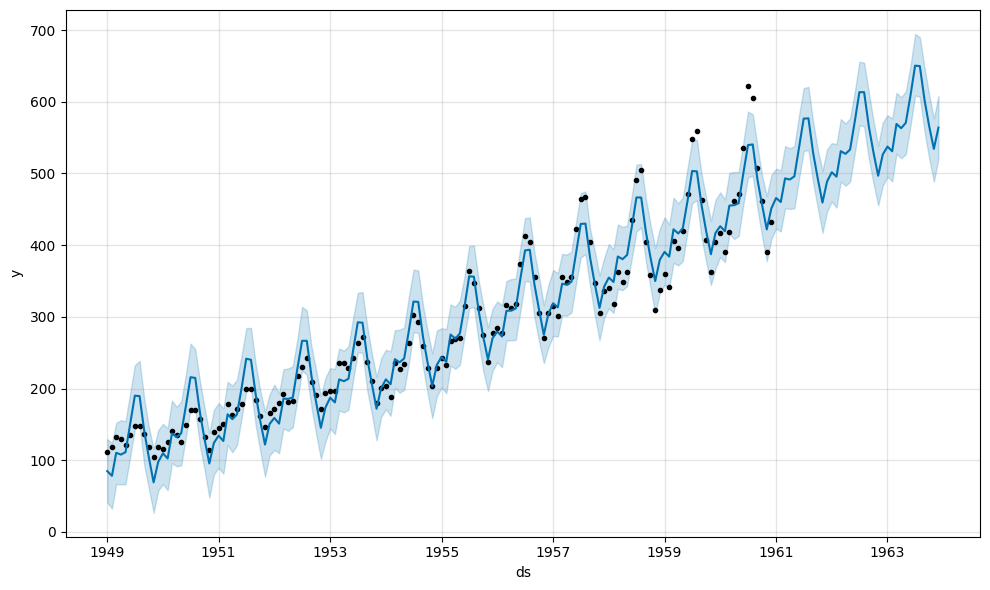

In [11]:
my_model.plot(forecast, uncertainty=True);

### Decomposition

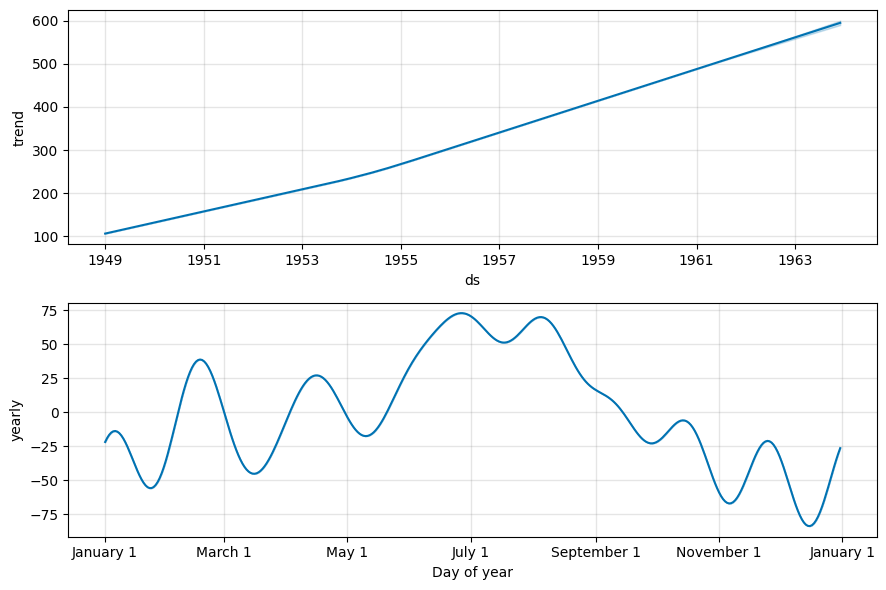

In [12]:
my_model.plot_components(forecast);

### Adding ChangePoints to Prophet

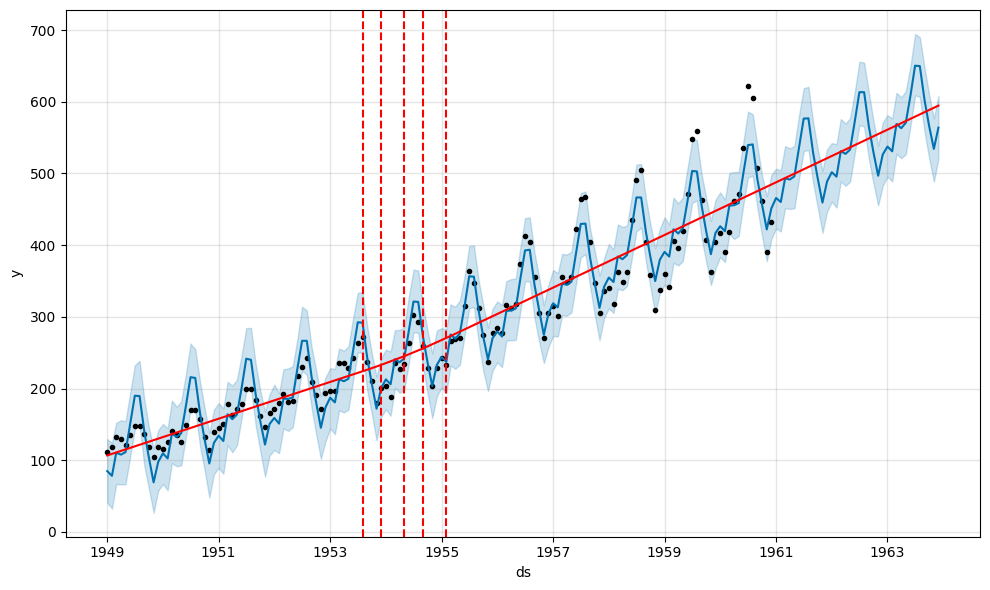

In [13]:
from prophet.plot import add_changepoints_to_plot

fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

In [14]:
my_model.changepoints

5     1949-06-01
9     1949-10-01
14    1950-03-01
18    1950-07-01
23    1950-12-01
27    1951-04-01
32    1951-09-01
36    1952-01-01
41    1952-06-01
46    1952-11-01
50    1953-03-01
55    1953-08-01
59    1953-12-01
64    1954-05-01
68    1954-09-01
73    1955-02-01
78    1955-07-01
82    1955-11-01
87    1956-04-01
91    1956-08-01
96    1957-01-01
100   1957-05-01
105   1957-10-01
109   1958-02-01
114   1958-07-01
Name: ds, dtype: datetime64[ns]

21:17:51 - cmdstanpy - INFO - Chain [1] start processing
21:17:51 - cmdstanpy - INFO - Chain [1] done processing


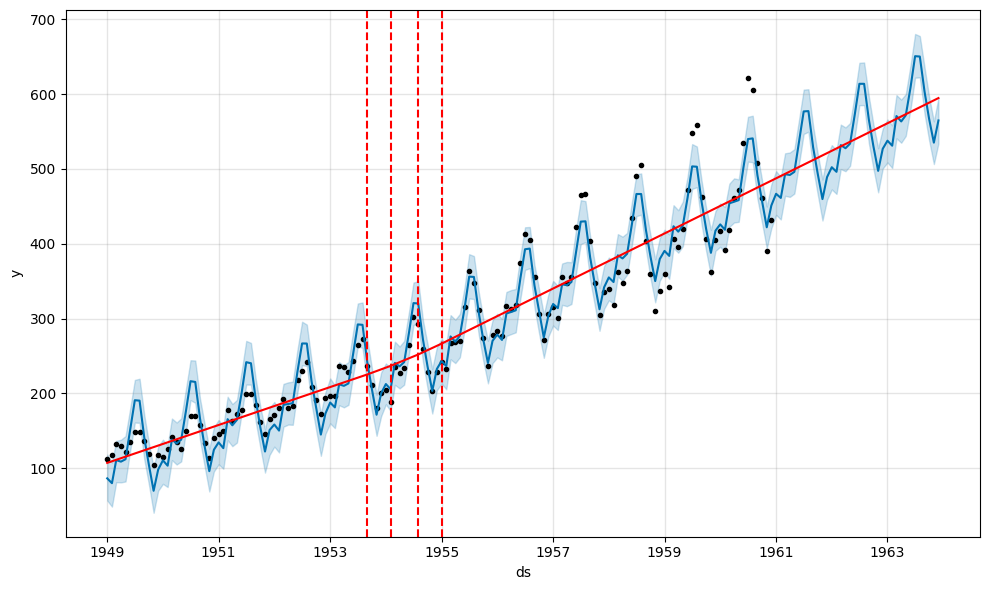

In [15]:
pro_change = Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df).predict(future_dates)
fig = pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [16]:
pro_change.changepoints

5     1949-06-01
10    1949-11-01
15    1950-04-01
20    1950-09-01
26    1951-03-01
31    1951-08-01
36    1952-01-01
41    1952-06-01
46    1952-11-01
51    1953-04-01
56    1953-09-01
61    1954-02-01
67    1954-08-01
72    1955-01-01
77    1955-06-01
82    1955-11-01
87    1956-04-01
92    1956-09-01
97    1957-02-01
102   1957-07-01
108   1958-01-01
113   1958-06-01
118   1958-11-01
123   1959-04-01
128   1959-09-01
Name: ds, dtype: datetime64[ns]

21:17:52 - cmdstanpy - INFO - Chain [1] start processing
21:17:52 - cmdstanpy - INFO - Chain [1] done processing


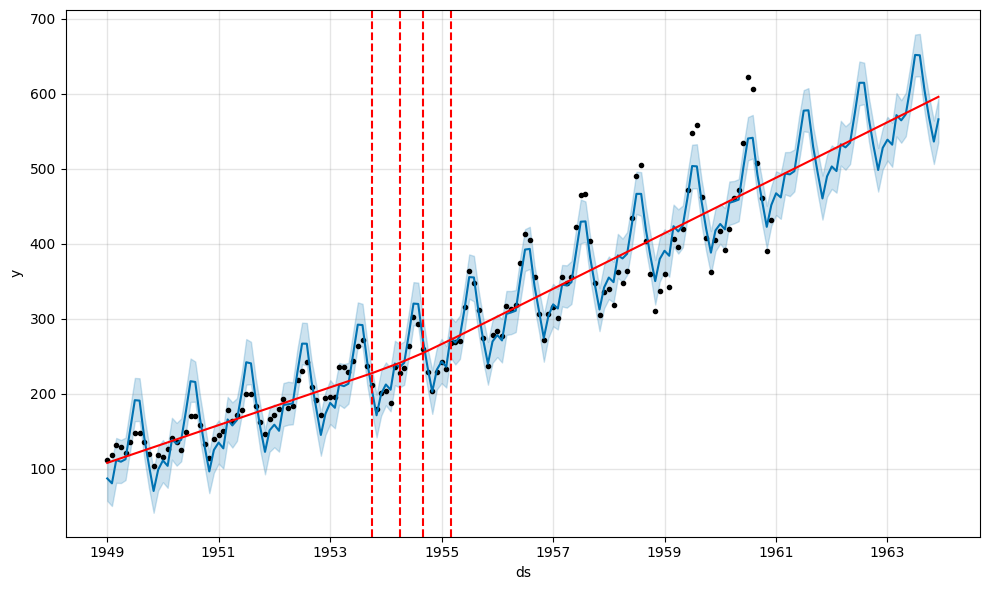

In [17]:
pro_change = Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df).predict(future_dates)
fig = pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [18]:
pro_change.changepoints

6     1949-07-01
11    1949-12-01
17    1950-06-01
23    1950-12-01
28    1951-05-01
34    1951-11-01
40    1952-05-01
46    1952-11-01
51    1953-04-01
57    1953-10-01
63    1954-04-01
68    1954-09-01
74    1955-03-01
80    1955-09-01
86    1956-03-01
91    1956-08-01
97    1957-02-01
103   1957-08-01
108   1958-01-01
114   1958-07-01
Name: ds, dtype: datetime64[ns]